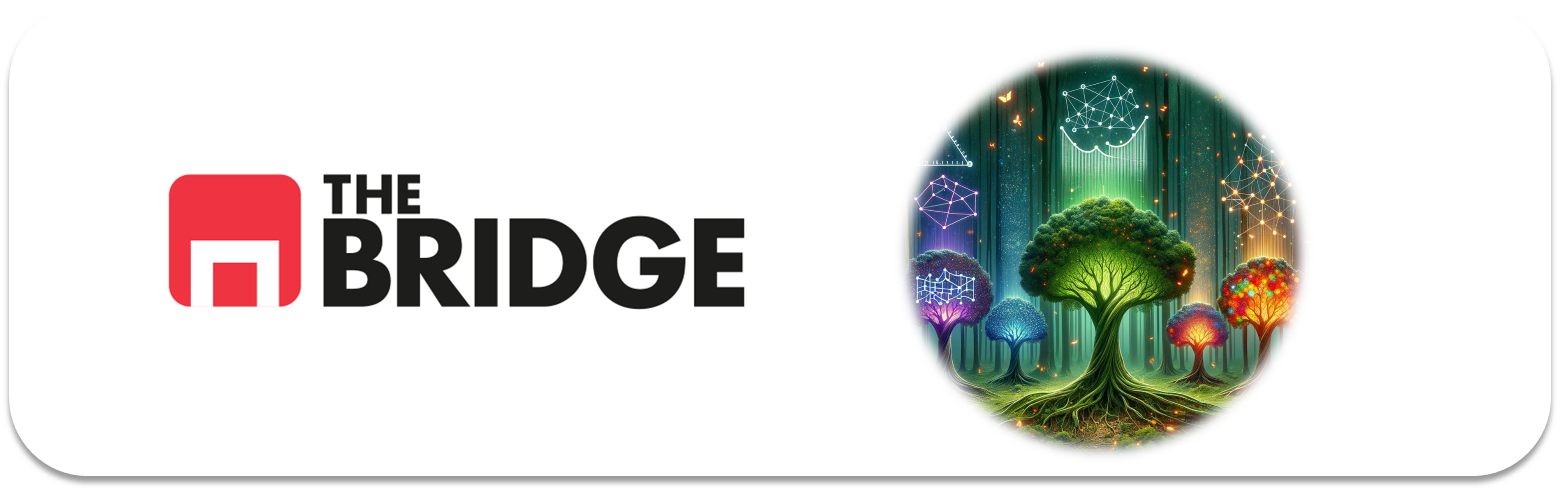

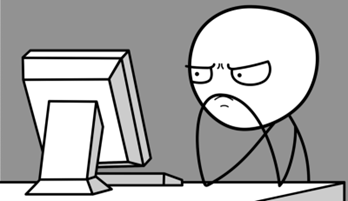

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import numpy as np
import pandas as pd
import sklearn
np.random.seed(42)


### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

In [3]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples = 10000, noise = 0.4)

In [4]:
X_moons.shape

(10000, 2)

In [5]:
y_moons.shape

(10000,)

<Axes: >

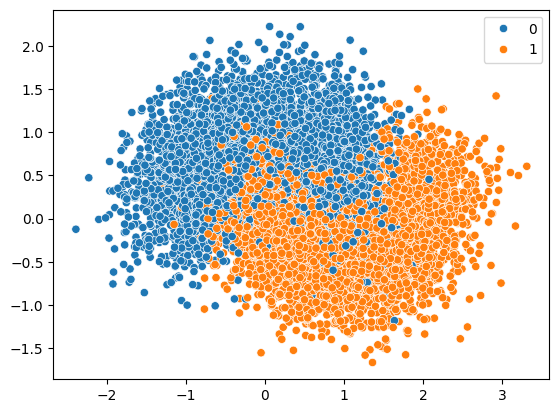

In [6]:
import seaborn as sns
sns.scatterplot(x = X_moons[:,0], y = X_moons[:,1], hue = y_moons)

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_moons,
    y_moons,
    test_size=0.2,
    random_state=42,
    stratify=y_moons)

In [8]:
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (8000, 2) (8000,)
Test: (2000, 2) (2000,)


### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [10]:
from sklearn.metrics import classification_report

tree_model.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [11]:
y_train_pred = tree_model.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [12]:
y_pred = tree_model.predict(X_test)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.80      0.80      0.80      1000

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [14]:
tree_model_2 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)

### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [15]:
tree_model_2.fit(X_train, y_train)
y_pred_2 = tree_model_2.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.82      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



Comenta el resultado

The second model generalises better and gives better results.

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [17]:
from sklearn.model_selection import ShuffleSplit

# Definimos el generador de shufflesplit

ss = ShuffleSplit(
    n_splits=1000,
    train_size=100,
    random_state=42
)

X_subsets = []
y_subsets = []

for train_idx,_ in ss.split(X_train):
    X_subsets.append(X_train[train_idx])
    y_subsets.append(y_train[train_idx])

In [18]:
print(len(X_subsets))
print(X_subsets[0].shape)

1000
(100, 2)


### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [19]:
forest = []

for X_sub, y_sub in zip(X_subsets, y_subsets):
    tree = DecisionTreeClassifier(
        max_depth=5,
        max_leaf_nodes=15,
        random_state=42
    )
    tree.fit(X_sub, y_sub)
    forest.append(tree)


In [20]:
print(len(forest))
print(type(forest[0]))

1000
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [21]:
from sklearn.metrics import accuracy_score
# crear una lista vacia para guardar los accuracies
accuracies = []

# iterar por todos los arboles
for tree in forest:
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    accuracies.append(acc)

In [22]:
mean_accuracy = sum(accuracies)/len(accuracies)
print(f"Mean accuracy of the forest: {mean_accuracy:.4f}")

Mean accuracy of the forest: 0.8076


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

In [23]:
# crear lista para guardar las predicciones
predicciones = []

# iterar todo los arboles para sacar las predcicciones
for tree in forest:
    y_pred = tree.predict(X_test)
    predicciones.append(y_pred)

### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [24]:
# Ejemplo de votación para la primera instancia de X_test

Y_pred_consejo = []

n_trees = len(predicciones)
n_test = len(predicciones[0])

for j in range(n_test):
    votos_0 = 0
    votos_1 = 0

    for i in range(n_trees):
        if predicciones[i][0] == 0:
            votos_0 += 1
        else:
            votos_1 += 1

    if votos_0 > votos_1:
        Y_pred_consejo.append(0)
    else:
        Y_pred_consejo.append(1)

In [25]:
pred_matrix = np.array(predicciones)
pred_matrix.shape

(1000, 2000)

In [26]:
from scipy.stats import mode
resultado = mode(pred_matrix, axis=0)


In [30]:
Y_pred_consejo = resultado.mode
print(Y_pred_consejo[:10])
len(Y_pred_consejo) == len(X_test)


[0 1 0 1 0 1 1 1 0 1]


True

### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`

In [29]:
from sklearn.metrics import accuracy_score
accuracy_consejo = accuracy_score(y_test, Y_pred_consejo)
print(f"Accuracy del consejo de árboles: {accuracy_consejo:.4f}")


Accuracy del consejo de árboles: 0.8640
